# Vatnsendi distributed heating network

Lets load the network and plot the topology

In [207]:

import numpy as np
import matplotlib.pyplot as plt
from epyt import epanet
import time

In [208]:


# Load the EPANET model
inp_file = "C:\\Users\\frodi\\Documents\\OptimisedHeating\\Epanet\\currently_working\\Vatnsendi_epanet_pumpcurve.inp"
d = epanet(inp_file)


EPANET version 20200 loaded (EPyT version v1.2.1 - Last Update: 09/01/2024).
Input File Vatnsendi_epanet_pumpcurve.inp loaded successfully.



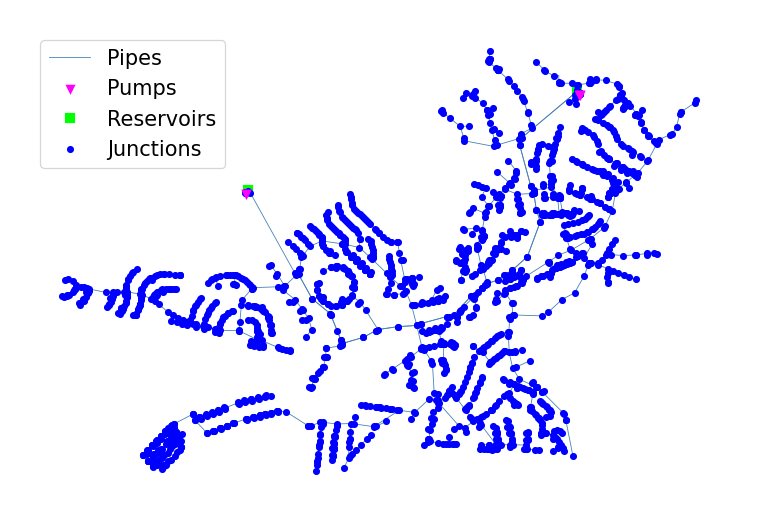

In [209]:
# Plot network topology
d.plot()
plt.show(block=True)  # Ensures only one plot is shown

In [210]:
# Run hydraulic analysis of a network
# Hydraulic analysis using binary file
# (This function ignore events)
hyd_res = d.getComputedTimeSeries()
print(f" Attributes calculated in  hydraulic analysis:  {list(hyd_res.to_dict().keys())}")
# Change time-stamps from seconds to hours
hrs_time = hyd_res.Time/3600

 Attributes calculated in  hydraulic analysis:  ['Time', 'Pressure', 'Demand', 'Head', 'NodeQuality', 'Flow', 'Velocity', 'HeadLoss', 'Status', 'Setting', 'ReactionRate', 'FrictionFactor', 'LinkQuality', 'WarnFlag', 'ErrCode', 'StatusStr']


c:\Users\frodi\AppData\Local\Programs\Python\Python313\Lib\site-packages\epyt\epanet.py:14410: UserWarning: WARNING: System may be hydraulically unstable.
  warnings.warn(errmssg.value.decode())


In [211]:
def get_node_indices(d, node_names_input):
    # Get the list of node names
    node_names = d.getNodeNameID()
    
    # Create a dictionary to map node names to indices using the list's index method
    node_name_to_index = {name: index for index, name in enumerate(node_names)}
    
    # Return a list of indices corresponding to the input node names
    node_indices = [node_name_to_index.get(name, None)+1 for name in node_names_input]
    
    return node_indices
# node_input_names = ['100','101','102']
# node_indices = get_node_indices(d,node_input_names)


In [212]:
# # Plot node pressures for specific nodes 
# node_names = d.getNodeNameID(node_indices)
# for index in node_indices:
#     d.plot_ts(X=hrs_time, Y=hyd_res.Pressure[:, index - 1],
#               title=f'Pressure for the node id {d.getNodeNameID(index)}',
#               xlabel='Time (hrs)', ylabel=f'Pressure ({d.units.NodePressureUnits})',
#               marker=None)

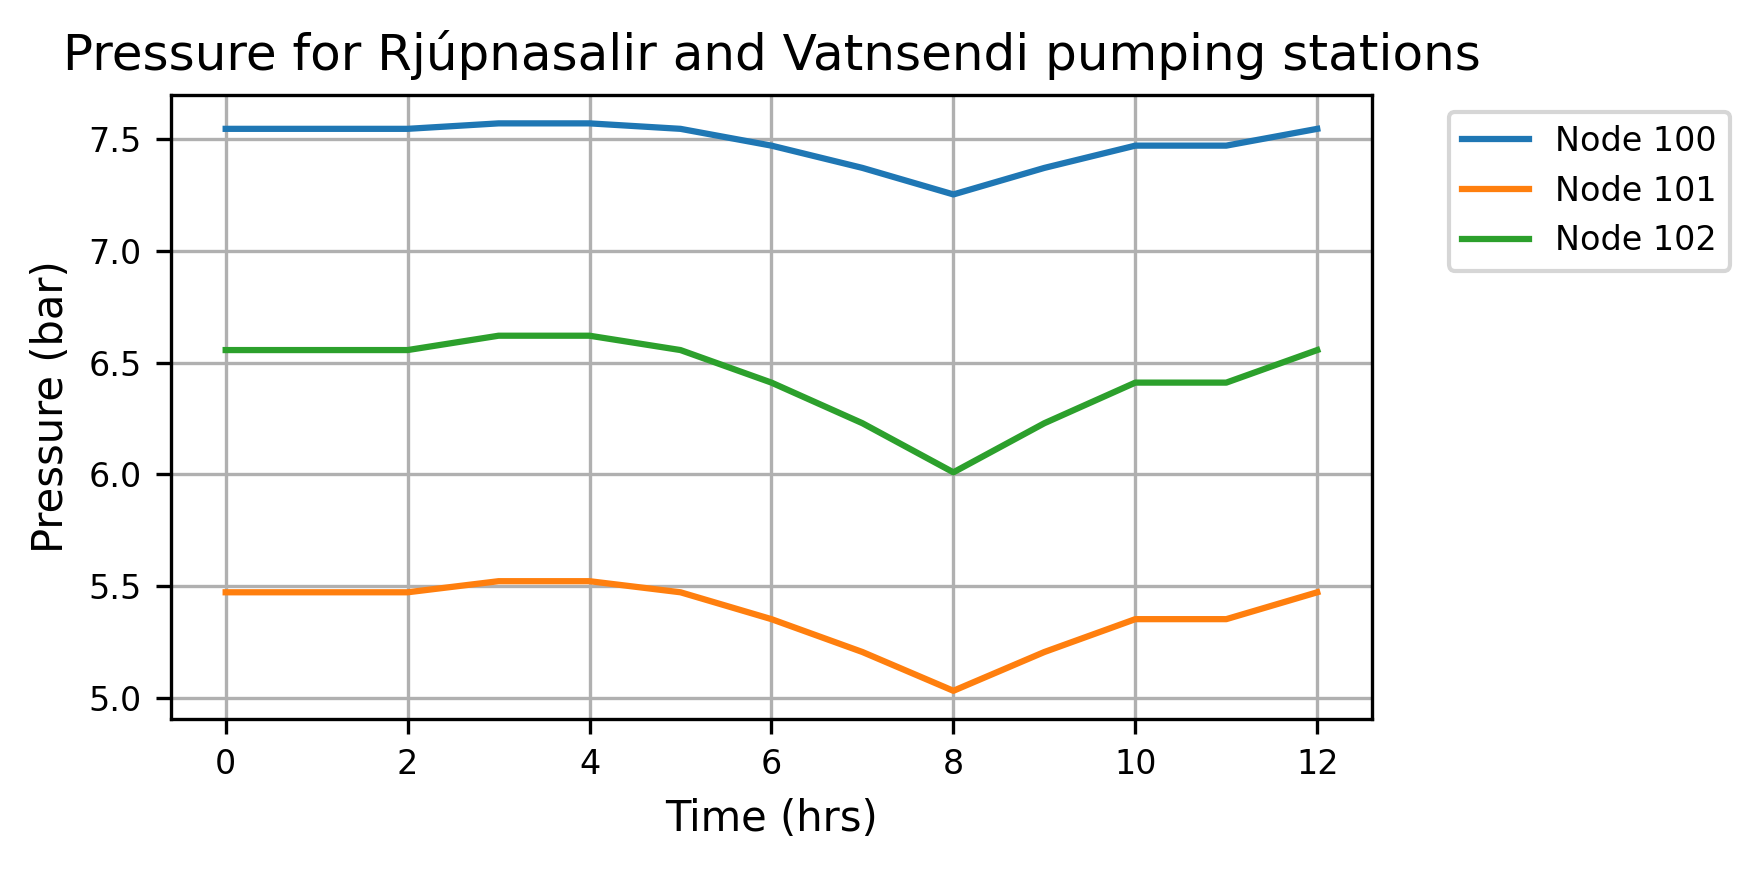

In [213]:


node_input_names = ['100','101','102']
node_indices = get_node_indices(d,node_input_names)
# Conversion factor from meters of water to bar
meters_to_bar = 0.0980665  # 1 meter of water = 0.0980665 bar

# Plot node pressures for specific nodes
node_names = d.getNodeNameID(node_indices)

# Create a figure
plt.figure(figsize=(6, 3))

# Loop through each node index and plot the corresponding pressure
for index in node_indices:
    # Convert pressure from meters to bar
    pressure_in_bar = hyd_res.Pressure[:, index - 1] * meters_to_bar
    plt.plot(hrs_time, pressure_in_bar, label=f'Node {d.getNodeNameID(index)}')

# Customize the plot
plt.title('Pressure for Rjúpnasalir and Vatnsendi pumping stations')
plt.xlabel('Time (hrs)')
plt.ylabel('Pressure (bar)')  # Updated ylabel to reflect pressure in bars

# Add a grid for better visualization
plt.grid(True)

# Move the legend outside the plot (to the right)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to prevent clipping of legend
plt.tight_layout()

# Show the plot
plt.show()


In [214]:
def get_link_indices(d, link_names_input):
    # Get the list of link names
    link_names = d.getLinkNameID()
    
    # Create a dictionary to map link names to indices using the list's index method
    link_name_to_index = {name: index for index, name in enumerate(link_names)}
    
    # Return a list of indices corresponding to the input link names (adding 1 for correct index)
    link_indices = [link_name_to_index.get(name, None) +1 for name in link_names_input]
    
    return link_indices


# print(d.getLinkNameID())


In [215]:

# # Specify the indices of the links you want to plot
# # link_input_names = ['11','19','Pipe-62614']
# link_input_names = ['11']
# link_indices = get_link_indices(d,link_input_names)
# print(link_indices)
# print(d.getLinkNameID(1855))



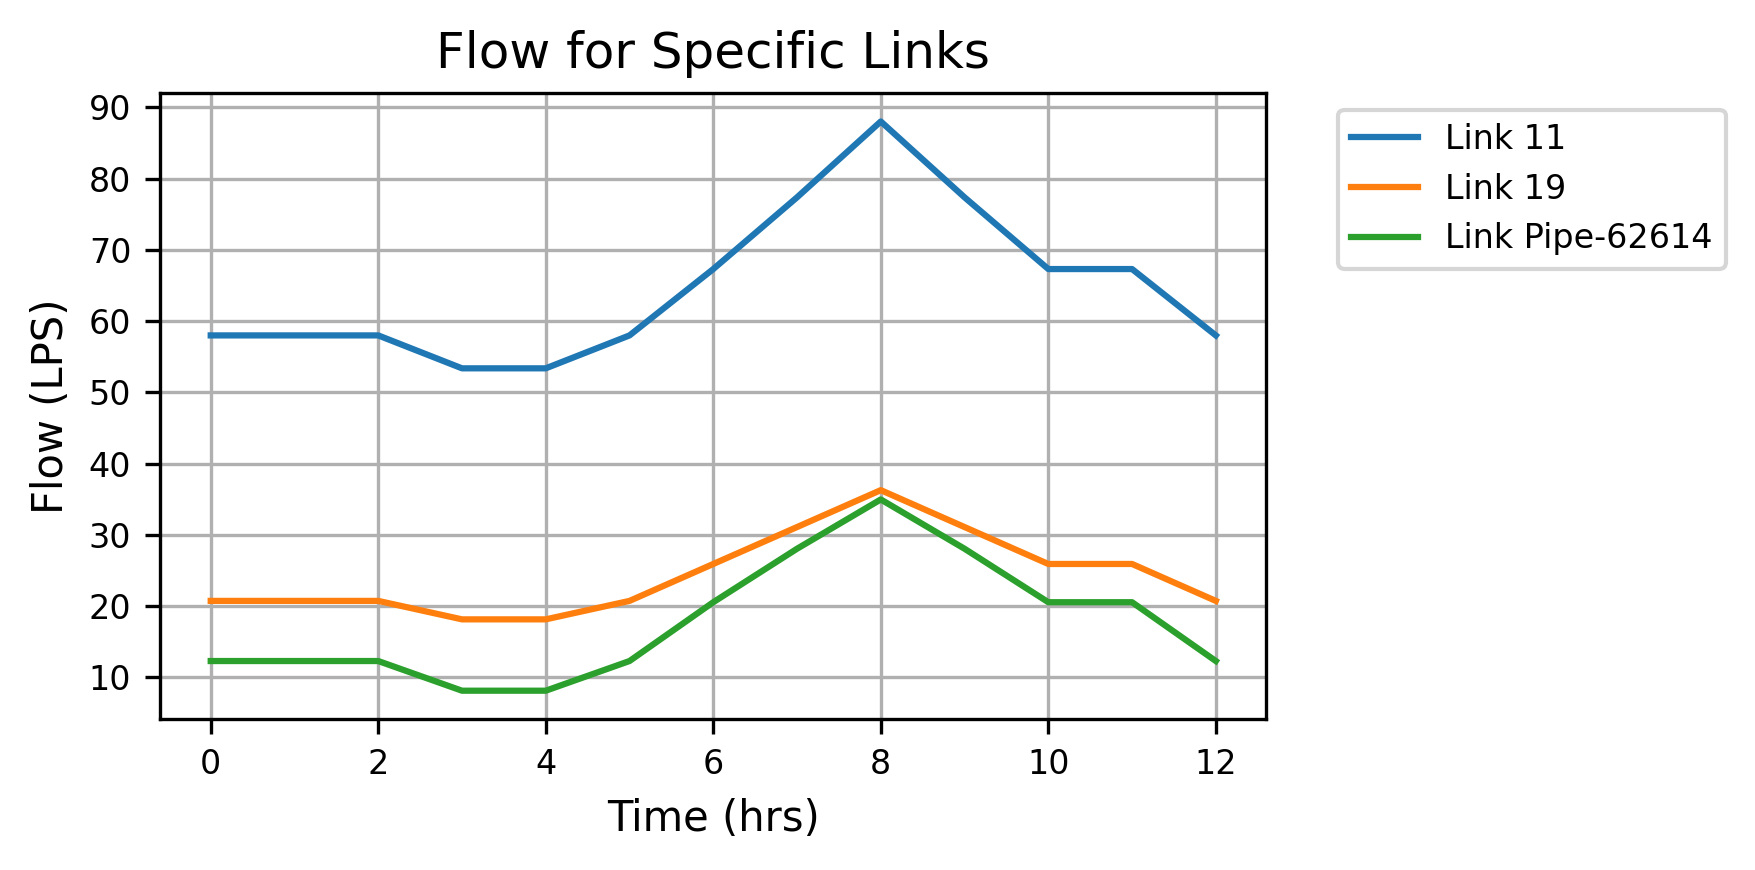

In [ ]:
link_input_names = ['11','19','Pipe-62614']
link_indices = get_link_indices(d,link_input_names)


# Create a figure
plt.figure(figsize=(6, 3))

# Loop through each link index and plot the corresponding absolute flow
for index in link_indices:
    # Extract the flow for the link and take the absolute value
    flow = np.abs(hyd_res.Flow[:, index - 1])  # Take absolute value of flow
    # Plot the absolute flow over time
    plt.plot(hrs_time, flow, label=f'Link {d.getLinkNameID(index)}')

# Customize the plot
plt.title('Flow for Specific Links')
plt.xlabel('Time (hrs)')
plt.ylabel(f'Flow ({d.units.LinkFlowUnits})')  # Units of link flow

# Add a grid for better visualization
plt.grid(True)

# Add a legend with the links, placed outside the plot to avoid cluttering
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to prevent clipping of legend
plt.tight_layout()

# Show the plot
plt.show()


In [224]:
link_input_names = ['17','10','25','26','27']
link_indices = get_link_indices(d,link_input_names)
link_indices

[1879, 1878, 1880, 1881, 1882]

In [227]:
d.getLinkEnergy(1881)


array(0.)